# Service, PHYS and PHYSLITE

This is a very quick demo - just showing off access to the ATLAS binary formats.

In [1]:
import matplotlib.pyplot as plt
import awkward as ak

Next, we'll use the following two files as local inputs for our running:

In [2]:
local_PHYS_r21 = r"C:\Users\gordo\Code\atlas\data\asg\mc_311321_physVal_Main.21.2.143.pool.root"
local_PHYSLITE_r22 = r"C:\Users\gordo\Code\atlas\data\asg\mc20_13TeV.410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.22.2.113.pool.root"
local_PHYS_r22 = r"C:\Users\gordo\Code\atlas\data\asg\mc_410470_ttbar.DAOD_PHYS.22.2.110.pool.root.1"

## Release 21 (Run 2 data)

For data written with release 21. I'm running locally:

* This means spinning up docker containers
* Most (or all) of the queries were run before the demo - so the default ServiceX packages means the results are cached.
* In most places I've written down the times they took so you can estimate...

In [3]:
from func_adl_servicex_xaodr21 import SXDSAtlasxAODR21PHYS

# These are needed b.c. we will play with calibration and systematic errors.
from func_adl_servicex_xaodr21 import calib_tools as calib_tools_r21

# If we want to run locally, however, not everything is configured simply.
from func_adl_servicex import SXLocalxAOD
from func_adl_servicex_xaodr21 import atlas_release as atlas_release_r21
from func_adl_servicex_xaodr21.event_collection import Event as EventR21

The release that the package we are using were built from:

In [4]:
print(f'release = {atlas_release_r21}')

release = 21.2.247


Next, lets create the dataset. When using regular ServiceX this is one line. Things aren't as nice if you want to use docker running locally...

In [5]:
# If you were running on servicex...
# ds = SXDSAtlasxAODR21PHYS(rucio_ds_name)

# To use the local docker
ds = SXLocalxAOD[EventR21](
    local_PHYS_r21,
    item_type=EventR21,
    docker_image="gitlab-registry.cern.ch/atlas/athena/analysisbase",
    docker_tag=atlas_release_r21,
    )
ds = calib_tools_r21.query_update(ds, calib_tools_r21.default_config("PHYS"))

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


Now we can make the query (don't forget to convert ATLAS MeV to GeV)!

In [6]:
jets = (
    ds
    .Select(lambda e: e.Jets())
    .Select(lambda e: e.Select(lambda j: j.pt()/1000.0))
    .as_awkward()
    .value()
)
print(jets)

[[68.3, 25.4, 26.2, 11.9], [43.4], ... 45, 13.2], [52, 14.4, 13.2, 19.3, 12.9]]


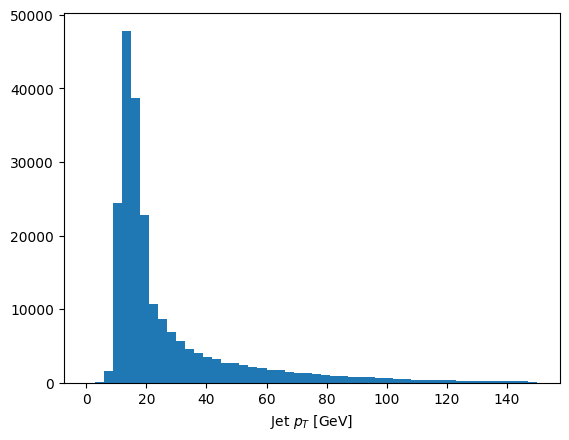

In [7]:
plt.hist(ak.flatten(jets), bins=50, range=(0, 150))
plt.xlabel('Jet $p_T$ [GeV]')
plt.show()

When I ran this the first time, it was 3 minutes and 33 seconds. Lets see the through put:

In [8]:
print(f'Rate = {len(jets)/(3*60+33)} Hz')

Rate = 281.6901408450704 Hz


## Release 22 data - PHYS

Lets do the same thing for R22 data using a R24 release.

In [9]:

# from func_adl_servicex_xaodr24 import SXDSAtlasxAODR24PHYS, SXDSAtlasxAODR24PHYSLITE
from func_adl_servicex_xaodr24 import calib_tools as calib_tools_r24

# If we want to run locally, however, we have a little more work to do...
from func_adl_servicex_xaodr24 import atlas_release as atlas_release_r24
from func_adl_servicex_xaodr24.event_collection import Event as EventR24

In [10]:
# ds = SXDSAtlasxAODR24PHYS(rucio_ds_name)

ds_r22 = SXLocalxAOD[EventR24](
    local_PHYS_r22,
    item_type=EventR24,
    docker_image="gitlab-registry.cern.ch/atlas/athena/analysisbase",
    docker_tag=atlas_release_r24,
    )
ds_r22 = calib_tools_r21.query_update(ds_r22, calib_tools_r24.default_config("PHYS"))

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


In [11]:
jets_r22 = (
    ds_r22
    .Select(lambda e: e.Jets())
    .Select(lambda e: e.Select(lambda j: j.pt()/1000.0))
    .as_awkward()
    .value()
)
print(jets_r22)
print(len(jets_r22))

[[52.3, 17.6, 11.3], [114, 13, 12], ... 17.8, 13.8], [124, 23.5, 20.8, 20.6, 18.3]]
40000


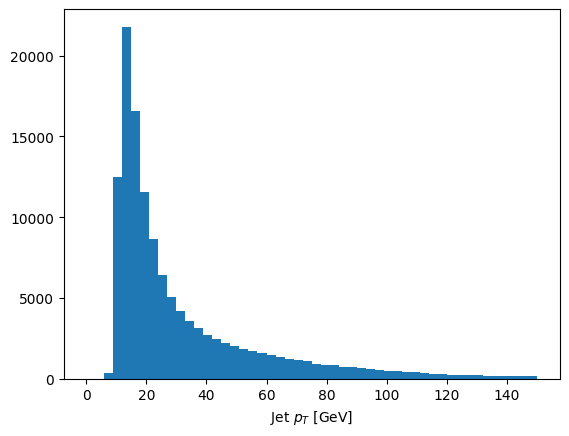

In [12]:
plt.hist(ak.flatten(jets_r22), bins=50, range=(0, 150))
plt.xlabel('Jet $p_T$ [GeV]')
plt.show()

When I ran that from scratch, that took 2 minutes and 25 seconds. What was the throughput?

In [13]:
print(f'Rate = {len(jets_r22)/(2*60+25)} for {len(jets_r22)} jets')

Rate = 275.86206896551727 for 40000 jets


## Release 22 Data - PHYSLITE

`PHYSLITE` is ATLAS' `nanoAOD` - calibrated and small.

Note the `PHYSLITE` config that is used - which changes how default calibrations are run (or not).

In [14]:
# ds = SXDSAtlasxAODR24PHYSLITE(rucio_ds_name)

ds_physlite_r22 = SXLocalxAOD[EventR24](
    local_PHYSLITE_r22,
    item_type=EventR24,
    docker_image="gitlab-registry.cern.ch/atlas/athena/analysisbase",
    docker_tag=atlas_release_r24,
    )
ds_physlite_r22 = calib_tools_r21.query_update(ds_physlite_r22, calib_tools_r24.default_config("PHYSLITE"))

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


In [15]:
jets_physlite_r22 = (
    ds_physlite_r22
    .Select(lambda e: e.Jets())
    .Select(lambda e: e.Select(lambda j: j.pt()/1000.0))
    .as_awkward()
    .value()
)
print(jets_physlite_r22)

[[94.9, 70, 33.8, 35.4, 22.6, 13.7], ... 81.5, 27.6, 24, 25.1, 19.9, 14.4, 15]]


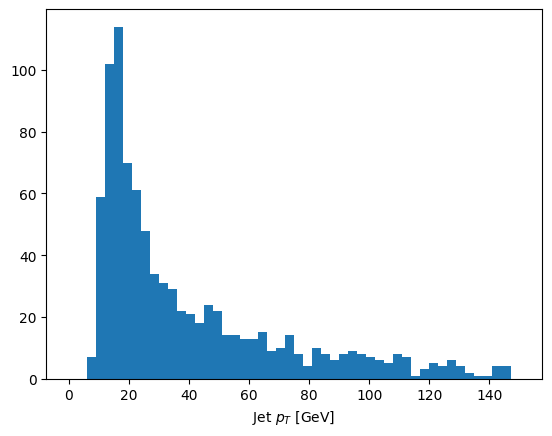

In [16]:
plt.hist(ak.flatten(jets_physlite_r22), bins=50, range=(0, 150))
plt.xlabel('Jet $p_T$ [GeV]')
plt.show()

This took 23 seconds to run, however it is only 100 events. And that is too few to really measure this considering the one-time overheads (C++ compile, etc.).

In [17]:
print(f'Rate = {len(jets_physlite_r22)/(19.8)} for {len(jets_physlite_r22)} jets')

Rate = 5.05050505050505 for 100 jets


## Calibrated and Uncalibrated

Very quickly - we can also look at the uncalibrated events - which is similar in speed to running on `PHYSLITE`.

In [18]:
jets_uncalib_r22 = (
    ds_r22
    .Select(lambda e: e.Jets(calibrate=False))
    .Select(lambda e: e.Select(lambda j: j.pt()/1000.0))
    .as_awkward()
    .value()
)
print(jets_uncalib_r22)

[[88.9, 67.1, 52, 50.9, 29.7, 15, 11.1], ... 17.2, 16.4, 15.6, 15, 13.4, 13.1, 12.2]]


Note that this took 31.6 seconds instead of 2 minutes and 5 seconds!

In [19]:
print(f'Rate = {len(jets_uncalib_r22)/(31.6)} for {len(jets_physlite_r22)} events')

Rate = 1265.8227848101264 for 100 events


This is about x5 times faster - and it gets better for more files or larger files.

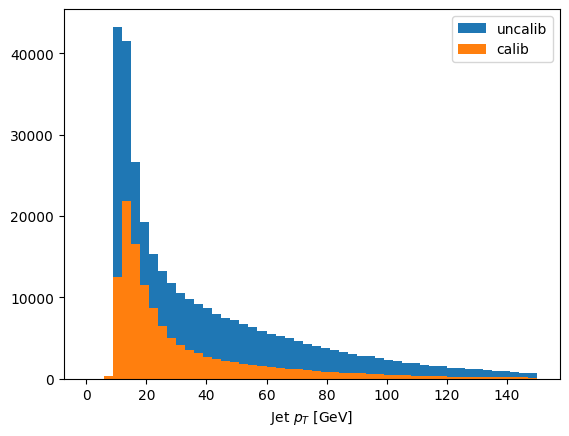

In [20]:
plt.hist(ak.flatten(jets_uncalib_r22), bins=50, range=(0, 150), label="uncalib")
plt.hist(ak.flatten(jets_r22), bins=50, range=(0, 150), label="calib")
plt.xlabel('Jet $p_T$ [GeV]')
plt.legend()
plt.show()

## A systematic error

Currently a single systematic error is supported as a proof-of-concept.

* ATLAS has 100+ of these errors
* They don't affect all the branches
* As Alex mentioned some affect just a weight and others affect values/columns of data.

Big question for ServiceX: How to efficiently move this data between query and result?

In [21]:
sys_jets = calib_tools_r24.query_sys_error(ds_r22, 'JET_Pileup_PtTerm__1up')

jets_sys_r22 = (
    sys_jets
    .Select(lambda e: e.Jets())
    .Select(lambda e: e.Select(lambda j: j.pt()/1000.0))
    .as_awkward()
    .value()
)
print(jets_sys_r22)

[[52.5, 17.4, 11.2], [115, 12.8, 11.6], ... 18, 13.7], [126, 23.4, 20.5, 20.4, 18.1]]


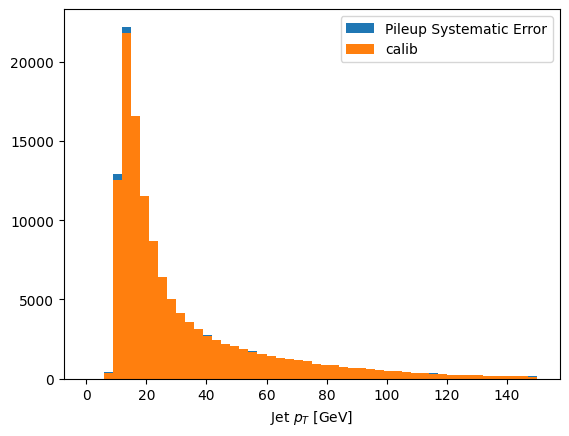

In [22]:
plt.hist(ak.flatten(jets_sys_r22), bins=50, range=(0, 150), label="Pileup Systematic Error")
plt.hist(ak.flatten(jets_r22), bins=50, range=(0, 150), label="calib")
plt.xlabel('Jet $p_T$ [GeV]')
plt.legend()
plt.show()

And in PHYSLITE with a few caveats...

* There is a bug in the ATLAS software - that means pileup corrections can't be applied again without a segfault.
* For reasons I'm not aware, this file is missing Tau jets - and that makes overlap removal fail, so turned off for the demo.

In [23]:
calib_tools_r24.default_config("PHYSLITE")

CalibrationEventConfig(jet_collection='AnalysisJets', jet_calib_truth_collection='AntiKt4TruthDressedWZJets', run_jet_ghost_muon_association=False, electron_collection='AnalysisElectrons', electron_working_point='MediumLHElectron', electron_isolation='NonIso', photon_collection='AnalysisPhotons', photon_working_point='Tight', photon_isolation='FixedCutTight', muon_collection='AnalysisMuons', muon_working_point='Medium', muon_isolation='NonIso', tau_collection='AnalysisTaus', tau_working_point='Tight', perform_overlap_removal=True, datatype='mc', correct_pileup=True, calibrate=False, uncalibrated_possible=False)

In [24]:
sys_jets_lite = calib_tools_r24.query_sys_error(ds_physlite_r22, 'JET_Pileup_PtTerm__1up')
sys_jets_lite = calib_tools_r24.query_update(sys_jets_lite, correct_pileup=False, perform_overlap_removal=False)

jets_lite_sys_r22 = (
    sys_jets_lite
    .Select(lambda e: e.Jets())
    .Select(lambda e: e.Select(lambda j: j.pt()/1000.0))
    .as_awkward()
    .value()
)
print(jets_lite_sys_r22)

[[90.8, 66.3, 33.7, 33.3, 23.9, 13.2], ... 77.5, 28.3, 25.2, 24.5, 16.5, 14.2, 14.1]]


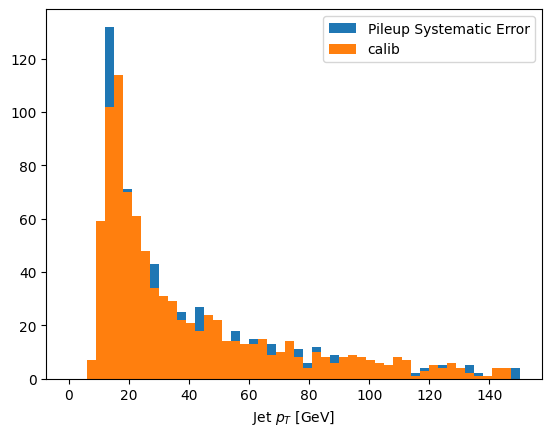

In [25]:
plt.hist(ak.flatten(jets_lite_sys_r22), bins=50, range=(0, 150), label="Pileup Systematic Error")
plt.hist(ak.flatten(jets_physlite_r22), bins=50, range=(0, 150), label="calib")
plt.xlabel('Jet $p_T$ [GeV]')
plt.legend()
plt.show()